In [10]:
import pandas as pd

In [11]:
from query_celery_tasks import get_queried_data_from_s3_by_batch, get_queried_data_from_s3_by_one, get_query_for_inspection, update_meta_data_postgre
from queries_config import WOMEN_ACCESSORIES_CASUAL_QUERY, MAN_OPEN_SHOES_FALL, UNISEX_SUMMER, META_DATA_UPDATE_QUERY, PATH_TO_SAVE_CSV, PATH_TO_SAVE_IMAGES

In [12]:
women_accessories_casual_query = get_query_for_inspection.delay(WOMEN_ACCESSORIES_CASUAL_QUERY, 100, PATH_TO_SAVE_CSV)
women_accessories_casual_query.ready()
women_accessories_casual_query.get(timeout=10)

"/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/csv/SELECT_*_FROM_test_WHERE_gender='Women'_AND_masterCategory='Accessories'_AND_usage='Casual'.csv"

In [13]:
women_accessories_casual_query_df = pd.read_csv("/home/olysavra/datasqueezer/data_pipeline/data_pipeline_processor/data/csv/SELECT_*_FROM_test_WHERE_gender='Women'_AND_masterCategory='Accessories'_AND_usage='Casual'.csv")

In [14]:
women_accessories_casual_query_df.head(n=)

,Unnamed: 0,index,id,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,meta_data,hash_key
0,0,0,48123,Women,Accessories,Belts,Belts,Black,Summer,2012,Casual,Fossil Women Black Huarache Weave Belt,"{'data': {'id': 48123, 'vat': 14.5, 'year': '2...",43cd917f35e5c048e8c2a850b3cdc498
1,1,1,47957,Women,Accessories,Bags,Handbags,Blue,Summer,2012,Casual,Murcia Women Blue Handbag,"{'data': {'id': 47957, 'vat': 14.5, 'year': '2...",c1de5d1fd4fa6d9bf63ef8efbbbc2d47
2,2,2,47359,Women,Accessories,Bags,Handbags,Brown,Summer,2012,Casual,Baggit Women Brown Handbag,"{'data': {'id': 47359, 'vat': 14.5, 'year': '2...",f6cf85a9c21b0e5fc57184c750069535
3,3,3,48311,Women,Accessories,Jewellery,Bracelet,Bronze,Winter,2012,Casual,Pitaraa Women Bronze Beaded Bracelet,"{'data': {'id': 48311, 'vat': 14.5, 'year': '2...",0dff9955a522ad90c6a8cc6810b3e27a
4,4,4,21977,Women,Accessories,Bags,Handbags,Brown,Winter,2015,Casual,Murcia Women Casual Brown Handbag,"{'data': {'id': 21977, 'vat': 14.5, 'year': '2...",555dd03a11714c82c1f3cf3213845496
5,5,5,58183,Women,Accessories,Bags,Handbags,White,Summer,2012,Casual,Rocky S Women White Handbag,"{'data': {'id': 58183, 'vat': 14.5, 'year': '2...",acc66f4333314d6a46894cc3f5a226dc
6,6,6,51658,Women,Accessories,Watches,Watches,Copper,Winter,2016,Casual,Fossil Women Copper Chronograph Watch CH2589,"{'data': {'id': 51658, 'vat': 14.5, 'year': '2...",93530fcd0e0ac80959c2c78c8b32b766
7,7,7,44984,Women,Accessories,Watches,Watches,White,Winter,2016,Casual,Maxima Women White Dial Watch,"{'data': {'id': 44984, 'vat': 14.5, 'year': '2...",6d319e8082cfd2e5540d92317404df21
8,8,8,38402,Women,Accessories,Belts,Belts,Black,Summer,2012,Casual,Baggit Women Hood Dabang Black Belt,"{'data': {'id': 38402, 'vat': 14.5, 'year': '2...",d119d9ca44ae1ab518ef947b9e738ed3
9,9,9,35913,Women,Accessories,Bags,Handbags,Black,Summer,2012,Casual,Peperone Women Black & White Handbag,"{'data': {'id': 35913, 'vat': 14.5, 'year': '2...",7c37875b8083121c17ec5d5e13da5eb3


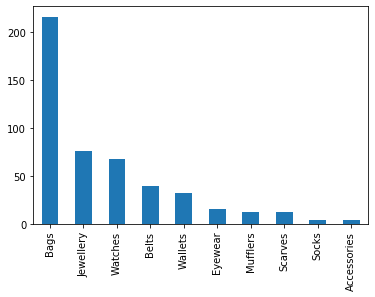

In [15]:
women_accessories_casual_query_df['subcategory'].value_counts().plot(kind='bar')

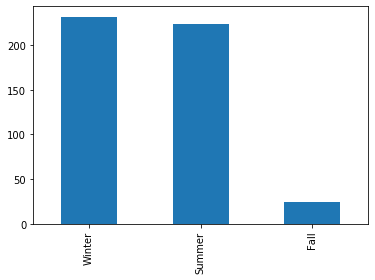

In [16]:
women_accessories_casual_query_df['season'].value_counts().plot(kind='bar')

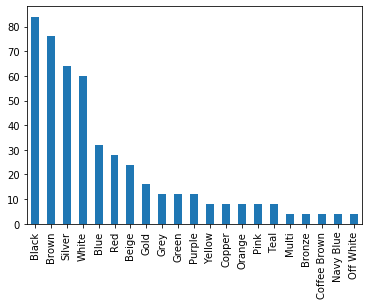

In [17]:
women_accessories_casual_query_df['basecolour'].value_counts().plot(kind='bar')

In [21]:
folder_for_images = get_queried_data_from_s3_by_one.apply_async(queue='low_priority', args=(WOMEN_ACCESSORIES_CASUAL_QUERY, 100, PATH_TO_SAVE_IMAGES))
folder_for_images.ready()
folder_for_images.get(timeout=100)